**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions. 

# 03: Data structure

Ya que *Python* está basado en objetos, existe una gran variedad y cantidad de tipos de objetos, que permiten almacenar información, los cuales presentan diferentes características y funciones. En términos generales, se dividen en estructuras primitivas, doden están los *integer*, *float*, *string*, y *boolean*; y los no primitivos como las *list*, *tuples*, y *dictionary*. *Python* también permite que el usuario construya tipo de objetos.

La librería *Pandas* también cuenta con un número importante de estructuras de datos, donde sobresalen las *series* and *dataframe*. Las *series* corresponden a vectores en 1 dimensión etiquetados que puede almacenar cualquier tipo de dato; por su parte los *dataframe* son arreglos etiquetados en dos dimensiones, tal como una hoja de excel, y representan el tipo de objeto de *panda* mas utilizado.

## Construcción del DataFrame

Para dar inicio a la construcción del modelo, inicialmente se debe partir de importar los datos y armar tanto la matriz de variables independientes (features), como el vector de la variable dependiente (label).

A continuación se presentan dos ejemplos, donde se inicia la construcción del modelo de datos con información espacial. Cada problema presenta sus propias particularidades, por lo que el procesamiento de los datos es completamente diferente.

El primero de los ejemplos corresponde a una base de datos construida en Excel sobre indices morfométricos de cuencas en los Andes colombianos. En este caso el procesamiento para la construcción es relativamente sencilla por que ya se cuenta con la base semi-estructurada.

En el segundo ejemplo se presenta una base de datos para el análisis de susceptibilidad por movimientos en masa. Para lo cual se tienen como variables predictoras una serie de mapas. Por lo cual se deben importar y convertir a vectores para formar una matriz.

A continuación se presenta cada uno de los casos.

## Modelo espacial a nivel de cuenca: Torrencialidad

Inicialmente se deben importar las librerías generales.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Para Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La base de datos se denominará *torren*, y se va a importar utilizando la función de Pandas read_excel, donde se debe ingresar como argumentos la dirección y el nombre de la hoja. También se utiliza la funcion de *shape* para concoer las dimensiones de la matriz. 

Como ventaja de la función en Pandas es que dicha base de datos es importada como un DataFrame.

In [ ]:
torren= pd.read_excel('/content/drive/My Drive/CATEDRA/MACHINE LEARNING/datos/Cuencas_torrencialidad.xlsx', sheet_name='Hoja2')
print(torren.shape)

(73, 32)


Para conocer el nombre de las columnas se utiliza la función *columns*, tambien para conocer el tipo de datos de cada columna la función *dtypes*.

In [ ]:
torren.columns

Index(['Name', 'Cuenca', 'Main Stream Order', 'Number of streams',
       'Stream Lenght', 'Main Stream Leght ', 'Stream Lenght Ratio',
       'Bifurcation Ratio ', 'Ro Coefficient', 'Lenght of Basin', 'Area ',
       'Perimeter', 'Form Factor', 'Elongation Ratio', 'Circularity Ratio',
       'Compactness Coefficient', 'Texture Ratio', 'Fitness Ratio',
       'Wandering ratio', 'Stream Frequency', 'Drainage Density',
       'Constant Channel mantenance', 'Drainage Intensity',
       'Infiltrarion Number', 'Leght of overland flow', 'Relief',
       'Mean Basin Slope', 'Relief Ratio', 'Rudgeness Number', 'Melton Index',
       'Ln Melton', 'Flash flood record'],
      dtype='object')

In [ ]:
y=torren["Flash flood record"]
print(y)

0     1
1     1
2     1
3     1
4     1
     ..
68    0
69    0
70    0
71    0
72    0
Name: Flash flood record, Length: 73, dtype: int64


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
torren.dtypes

Name                            object
Cuenca                           int64
Main Stream Order                int64
Number of streams                int64
Stream Lenght                  float64
Main Stream Leght              float64
Stream Lenght Ratio            float64
Bifurcation Ratio              float64
Ro Coefficient                 float64
Lenght of Basin                float64
Area                           float64
Perimeter                      float64
Form Factor                    float64
Elongation Ratio               float64
Circularity Ratio              float64
Compactness Coefficient        float64
Texture Ratio                  float64
Fitness Ratio                  float64
Wandering ratio                float64
Stream Frequency               float64
Drainage Density               float64
Constant Channel mantenance    float64
Drainage Intensity             float64
Infiltrarion Number            float64
Leght of overland flow         float64
Relief                   

Para dar una mirada a la base de datos llamamos las primeras 5 filas con la función *head*, o las últimas filas con *tail*.

In [ ]:
torren.head()

,Name,Cuenca,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
0,DESMOTADORA (Dabeiba),1,2,3,4.9820,4.048,0.907351,2.00,2.204219,5.904,5.1330,12.454,0.147258,0.433006,0.415876,1.561689,0.160591,0.325036,0.685637,0.584454,0.970583,1.030309,0.602168,0.567260,0.515155,1.319,24.320,0.223408,1.280198,0.582183,-0.540971,1
1,LA ARBOLEDA (Cdad Bolivar) ¿represamiento?,2,2,3,6.5693,5.997,0.531716,2.00,3.761404,8.961,13.5680,18.516,0.168967,0.463828,0.497315,1.428106,0.108015,0.323882,0.669233,0.221108,0.484176,2.065365,0.456670,0.107055,1.032682,1.968,28.100,0.219618,0.952858,0.534278,-0.626839,1
2,LIBORIANA (Salgar),3,3,12,31.8530,18.117,1.496572,3.25,2.099288,20.617,58.6032,47.543,0.137870,0.418977,0.325805,1.764400,0.189302,0.381066,0.878741,0.204767,0.543537,1.839802,0.376731,0.111298,0.919901,2.484,28.860,0.120483,1.350146,0.324482,-1.125524,1
3,LA ARENOSA (San Carlos),4,3,31,26.4590,6.152,2.050357,5.00,2.965810,7.199,12.0600,17.075,0.232704,0.544323,0.519799,1.396877,1.464129,0.360293,0.854563,2.570481,2.193947,0.455800,1.171624,5.639499,0.227900,0.903,20.669,0.125434,1.981134,0.260024,-1.346980,1
4,EL BARRO (Bello),5,2,4,10.4070,7.350,5.128386,3.00,0.584979,9.523,10.6980,20.898,0.117966,0.387554,0.307824,1.815201,0.143554,0.351708,0.771816,0.373902,0.972799,1.027962,0.384357,0.363731,0.513981,1.299,17.790,0.136407,1.263665,0.397153,-0.923434,1


In [ ]:
torren.iloc[5:12,:]

,Name,Cuenca,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
5,TAPARTÓ (Andes),6,4,30,70.294,30.186,2.282589,2.275,2.041470,32.542,121.834,64.550,0.115048,0.382732,0.367440,1.661435,0.340821,0.467637,0.927601,0.246237,0.576965,1.733206,0.426779,0.142070,0.866603,2.599,26.390,0.079866,1.499533,0.235463,-1.446203,1
6,TABAQUERO (Cañasgordas) sin datos de daños,7,3,9,3.503,2.576,1.061497,2.500,2.570182,3.101,1.333,6.083,0.138620,0.420115,0.452694,1.496835,0.986355,0.423475,0.830700,6.751688,2.627907,0.380531,2.569226,17.742808,0.190265,0.674,26.696,0.217349,1.771209,0.583774,-0.538241,1
7,EL INDIO (Uramita),8,3,11,8.348,3.536,1.822621,3.000,1.469104,4.218,4.625,9.733,0.259955,0.575313,0.613519,1.285766,0.821946,0.363300,0.838312,2.378378,1.804973,0.554025,1.317681,4.292909,0.277012,1.012,31.098,0.239924,1.826633,0.470570,-0.753810,1
8,SANTA ISABEL (Titiribi) Muy vieja,9,2,8,29.822,19.858,1.400547,7.000,4.998046,22.711,47.468,46.635,0.092030,0.342310,0.274275,1.923015,0.150102,0.425818,0.874378,0.168535,0.628255,1.591711,0.268258,0.105883,0.795855,1.755,21.470,0.077275,1.102587,0.254728,-1.367559,1
9,LLANADAS (Argelia) Sin datos de daños,10,3,15,15.895,6.774,1.869667,4.000,1.626193,7.592,6.913,15.076,0.119937,0.390780,0.382212,1.629011,0.795967,0.449323,0.892255,2.169825,2.299291,0.434917,0.943693,4.989059,0.217458,1.518,19.550,0.199947,3.490324,0.577349,-0.549308,1
10,JUAN RAMOS (Ebejico),11,2,9,8.625,4.258,1.508436,8.000,5.303507,4.950,5.066,10.562,0.206754,0.513077,0.570667,1.333168,0.757432,0.403143,0.860202,1.776550,1.702527,0.587362,1.043478,3.024623,0.293681,1.212,28.777,0.244848,2.063462,0.538481,-0.619004,1
11,AYURA (Envigado),12,4,52,47.297,9.869,2.165780,2.775,1.670962,10.295,24.909,23.594,0.235019,0.547025,0.562293,1.343058,1.652963,0.418284,0.958621,2.087599,1.898792,0.526651,1.099435,3.963915,0.263325,1.369,22.047,0.132977,2.599446,0.274300,-1.293534,1


In [ ]:
torren.tail(4)

,Name,Cuenca,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,...,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
69,"RIO ESPIRITU SANTO (Agustín Codazzi, Cesar)",70,5,132,371.352,66.906,1.933738,3.497222,2.576631,70.369,...,0.355458,0.155114,0.756900,3.442,24.740,0.009269,2.273747,0.004956,-5.307082,0
70,"QUEBRADA AGUA FRIA (Contratación, Santander)",71,2,9,23.183,10.146,1.720253,8.000000,4.650477,12.510,...,0.388216,0.224086,0.658112,1.576,25.196,0.067981,1.197365,0.024035,-3.728250,0
71,"QUEBRADA SANTO CRISTO (Soatá, Boyacá)",72,3,9,28.589,13.976,2.158894,2.500000,1.184412,15.841,...,0.314806,0.123162,0.799381,2.033,25.220,0.071111,1.271609,0.044975,-3.101655,0
72,"QUEBRADA LIBARE (Salamina, Caldas)",73,2,4,5.103,3.284,1.703763,3.000000,1.760809,5.650,...,0.783853,0.261915,0.864981,0.563,17.086,0.110327,0.325441,0.063697,-2.753610,0


Para tener un vector aparte con el nombre de las quebradas utilizamos la siguiente función de DataFrame.

In [ ]:
nombre=torren['Name']
type(nombre)

pandas.core.series.Series

In [ ]:
print(nombre)

0                            DESMOTADORA (Dabeiba)
1       LA ARBOLEDA (Cdad Bolivar) ¿represamiento?
2                               LIBORIANA (Salgar)
3                          LA ARENOSA (San Carlos)
4                                 EL BARRO (Bello)
                          ...                     
68                 RIO VALLECITOS (Líbano, Tolima)
69     RIO ESPIRITU SANTO (Agustín Codazzi, Cesar)
70    QUEBRADA AGUA FRIA (Contratación, Santander)
71           QUEBRADA SANTO CRISTO (Soatá, Boyacá)
72              QUEBRADA LIBARE (Salamina, Caldas)
Name: Name, Length: 73, dtype: object


Finalmente para construir solo la base de datos con los *features*, eliminamos de la base de datos denominada torren todas las columnas que no nos interesan.

In [ ]:
features=torren.drop(['Name','Cuenca','Flash flood record'],axis=1)
print(features.shape)
features.head(5)

(73, 29)


,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,...,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton
0,2,3,4.9820,4.048,0.907351,2.00,2.204219,5.904,5.1330,12.454,...,1.030309,0.602168,0.567260,0.515155,1.319,24.320,0.223408,1.280198,0.582183,-0.540971
1,2,3,6.5693,5.997,0.531716,2.00,3.761404,8.961,13.5680,18.516,...,2.065365,0.456670,0.107055,1.032682,1.968,28.100,0.219618,0.952858,0.534278,-0.626839
2,3,12,31.8530,18.117,1.496572,3.25,2.099288,20.617,58.6032,47.543,...,1.839802,0.376731,0.111298,0.919901,2.484,28.860,0.120483,1.350146,0.324482,-1.125524
3,3,31,26.4590,6.152,2.050357,5.00,2.965810,7.199,12.0600,17.075,...,0.455800,1.171624,5.639499,0.227900,0.903,20.669,0.125434,1.981134,0.260024,-1.346980
4,2,4,10.4070,7.350,5.128386,3.00,0.584979,9.523,10.6980,20.898,...,1.027962,0.384357,0.363731,0.513981,1.299,17.790,0.136407,1.263665,0.397153,-0.923434


In [ ]:
feature1=torren.drop([2])
print(feature1.shape)
feature1.head(5)

(72, 32)


,Name,Cuenca,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
0,DESMOTADORA (Dabeiba),1,2,3,4.9820,4.048,0.907351,2.000,2.204219,5.904,5.133,12.454,0.147258,0.433006,0.415876,1.561689,0.160591,0.325036,0.685637,0.584454,0.970583,1.030309,0.602168,0.567260,0.515155,1.319,24.320,0.223408,1.280198,0.582183,-0.540971,1
1,LA ARBOLEDA (Cdad Bolivar) ¿represamiento?,2,2,3,6.5693,5.997,0.531716,2.000,3.761404,8.961,13.568,18.516,0.168967,0.463828,0.497315,1.428106,0.108015,0.323882,0.669233,0.221108,0.484176,2.065365,0.456670,0.107055,1.032682,1.968,28.100,0.219618,0.952858,0.534278,-0.626839,1
3,LA ARENOSA (San Carlos),4,3,31,26.4590,6.152,2.050357,5.000,2.965810,7.199,12.060,17.075,0.232704,0.544323,0.519799,1.396877,1.464129,0.360293,0.854563,2.570481,2.193947,0.455800,1.171624,5.639499,0.227900,0.903,20.669,0.125434,1.981134,0.260024,-1.346980,1
4,EL BARRO (Bello),5,2,4,10.4070,7.350,5.128386,3.000,0.584979,9.523,10.698,20.898,0.117966,0.387554,0.307824,1.815201,0.143554,0.351708,0.771816,0.373902,0.972799,1.027962,0.384357,0.363731,0.513981,1.299,17.790,0.136407,1.263665,0.397153,-0.923434,1
5,TAPARTÓ (Andes),6,4,30,70.2940,30.186,2.282589,2.275,2.041470,32.542,121.834,64.550,0.115048,0.382732,0.367440,1.661435,0.340821,0.467637,0.927601,0.246237,0.576965,1.733206,0.426779,0.142070,0.866603,2.599,26.390,0.079866,1.499533,0.235463,-1.446203,1


Y para construir el vector de la variable dependiente llamamos la última columna.

In [ ]:
label=torren['Flash flood record']
label.tail(4)

69    0
70    0
71    0
72    0
Name: Flash flood record, dtype: int64

## Modelo espacial a nivel de *grid cell*: Susceptibilidad por MenM

Para importar los mapas como matrices se debe llamar el paquete de *gdal* y sus funciones para abrir el archivo, obtener la banda y leerlo como una matriz.

In [ ]:
from osgeo import gdal

In [ ]:
#ruta='content\drive\My Drive\CATEDRA\MACHINE LEARNING\datos\la_miel'
file = gdal.Open("/Aspecto.tif")

In [ ]:
type(file)

osgeo.gdal.Dataset

In [ ]:
raster = file.GetRasterBand(1)
type(raster)

osgeo.gdal.Band

In [ ]:
aspecto = raster.ReadAsArray()
print(aspecto)

[[-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]
 ...
 [-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]
 [-999. -999. -999. ... -999. -999. -999.]]


In [ ]:
type(aspecto)

numpy.ndarray

In [ ]:
aspecto.shape

(1297, 1430)

In [ ]:
print(1297*1430)

1854710


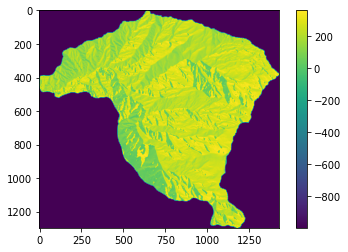

In [ ]:
plt.imshow(aspecto)
plt.colorbar();

Sin embargo el mapa tiene como nodata el valor de -999, por lo tanto es mejor reemplazar dichas celdas con NaN.

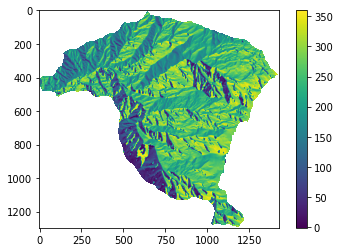

In [ ]:
aspecto=np.where(aspecto==-999,np.nan,aspecto)
plt.imshow(aspecto)
plt.colorbar();

In [ ]:
print(aspecto)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


El mapa como matriz del aspecto del terreno se debe transformar a un vector, que luego nos permita formar la matriz de *features*. Para esto utilizamos la función *ravel*. Pero debemos eliminar de ese evector todas las celdas que son NaN, ya que los métodos de machine learning no trabajan con este dato. Finalmente obtenemos la longitud del vector para verificar en todos los mapas.

In [ ]:
aspecto_vector=aspecto.ravel()
print(aspecto_vector.shape)

(1854710,)


In [ ]:
aspecto_vector

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [ ]:
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape

(910801,)

In [ ]:
type(aspecto_vector_MenM)

numpy.ndarray

In [ ]:
aspecto_S=pd.Series(aspecto_vector_MenM)
type(aspecto_S)

pandas.core.series.Series

In [ ]:
aspecto_S.head(5)

0    208.523560
1    207.437332
2    202.684647
3    211.619766
4    220.028976
dtype: float32

A continuación se importan de forma similar todas las variables independientes a utilizar inicialmente en el análisis y se transforman a un vector. Siempre se debe verificar que tenga las mismas dimensiones de las demás variables.

In [ ]:
file = gdal.Open(ruta+'\Buffer_Drenajes.tif')
raster = file.GetRasterBand(1)
drenajes = raster.ReadAsArray()
drenajes=np.where(drenajes==-999,np.nan,drenajes)
plt.imshow(drenajes)
plt.colorbar();
drenajes_vector=drenajes.ravel()
drenajes_vector_MenM=drenajes_vector[~np.isnan(drenajes_vector)]
drenajes_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\Curvatura_Categorica.tif')
raster = file.GetRasterBand(1)
curvatura = raster.ReadAsArray()
curvatura = np.where(curvatura==-999,np.nan,curvatura)
plt.imshow(curvatura)
plt.colorbar();
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
curvatura_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\FlujoAcumulado.tif')
raster = file.GetRasterBand(1)
flujo = raster.ReadAsArray()
flujo = np.where(flujo==-999,np.nan,flujo)
plt.imshow(flujo)
plt.colorbar();
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
flujo_vector_MenM.shape

AttributeError: ignored

In [ ]:
file = gdal.Open(ruta+'\Geologia_Superficial.tif')
raster = file.GetRasterBand(1)
geologia = raster.ReadAsArray()
geologia = np.where(geologia==-999,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar();
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
geologia_vector_MenM.shape

In [ ]:
np.unique(geologia_vector_MenM)

In [ ]:
geologia_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\Pendiente.tif')
raster = file.GetRasterBand(1)
pendiente = raster.ReadAsArray()
pendiente = np.where(pendiente==-999,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
pendiente_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\Rugosidad.tif')
raster = file.GetRasterBand(1)
rugosidad = raster.ReadAsArray()
rugosidad = np.where(rugosidad==-999,np.nan,rugosidad)
plt.imshow(rugosidad)
plt.colorbar();
rugosidad_vector=rugosidad.ravel()
rugosidad_vector_MenM=rugosidad_vector[~np.isnan(rugosidad_vector)]
rugosidad_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\SPI.tif')
raster = file.GetRasterBand(1)
SPI = raster.ReadAsArray()
SPI = np.where(SPI==-999,np.nan,SPI)
plt.imshow(SPI)
plt.colorbar();
SPI_vector=SPI.ravel()
SPI_vector_MenM=SPI_vector[~np.isnan(SPI_vector)]
SPI_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\STI.tif')
raster = file.GetRasterBand(1)
STI= raster.ReadAsArray()
STI = np.where(STI==-999,np.nan,STI)
plt.imshow(STI)
plt.colorbar();
STI_vector=STI.ravel()
STI_vector_MenM=STI_vector[~np.isnan(STI_vector)]
STI_vector_MenM.shape

In [ ]:
file = gdal.Open(ruta+'\TWI.tif')
raster = file.GetRasterBand(1)
TWI = raster.ReadAsArray()
TWI = np.where(TWI==-999,np.nan,TWI)
plt.imshow(TWI)
plt.colorbar();
TWI_vector=TWI.ravel()
TWI_vector_MenM=TWI_vector[~np.isnan(TWI_vector)]
TWI_vector_MenM.shape

La variable dependiente, a predecir, es la ocurrencia de movimientos en masa. Para eso se utiliza para el entrenamiento una base de datos de inventario de eventos de la zona de estudio. El cual se importa como un mapa binario y se tranforma a un vector de forma similar.

In [ ]:
file = gdal.Open(ruta+'\Inventario_MenM.tif')
raster = file.GetRasterBand(1)
inventario = raster.ReadAsArray()
inventario=np.where(pendiente1!=-999.0,inventario,np.nan)
plt.imshow(inventario)
plt.colorbar()
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
inventario_vector_MenM.shape
print(np.array(np.unique(inventario_vector, return_counts=True)).T)

Finalmente se construye un diccionario de Pandas, denominado *d*, para posteriormente construir el Dataframe *df*. De *df* se construye otro DataFrame con los *features* denominado *x*, y un vector con el *label*, denominado *y*.

In [ ]:
#Dataframe con las variables filtradas 
d={'inventario':inventario_vector_MenM,'drenajes':drenajes_vector_MenM,'pendiente':pendiente_vector_MenM,'geologia':geologia_vector_MenM,'flujo':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM,'rugosidad':rugosidad_vector_MenM,'TWI':TWI_vector_MenM,'STI':STI_vector_MenM,'SPI':SPI_vector_MenM}
df = pd.DataFrame(d)

In [ ]:
type(df)

In [ ]:
print(list(df.columns))

In [ ]:
X=df.drop('inventario',axis=1)
print(X.columns)
print((X.shape))

In [ ]:
y=df['inventario']
print(y.shape)

In [ ]:
X.head(5)

In [ ]:
y.head(5)